In [2]:
# To train call 'neat_train.py' with arguments.
!python neat_train.py

neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
['mpirun', '-np', '9', '/Users/inata/dev/NEAT/prettyNEAT/.venv/bin/python', 'neat_train.py']
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did y

In [3]:
# Train using default NEAT parameters on cart-pole swing-up with a small population and few generations
!cat p/quickTest.json
!python neat_train.py -p p/quickTest.json

{
    "task":"swingup",
    "maxGen": 4,
    "popSize": 16
}
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
['mpirun', '-np', '9', '/Users/inata/dev/NEAT/prettyNEAT/.venv/bin/python', 'neat_train.py', '-p', 'p/quickTest.json']
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (gen%hyp['save_mod']) is 0:
neat_train.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 

Text(0, 0.5, 'Fitness')

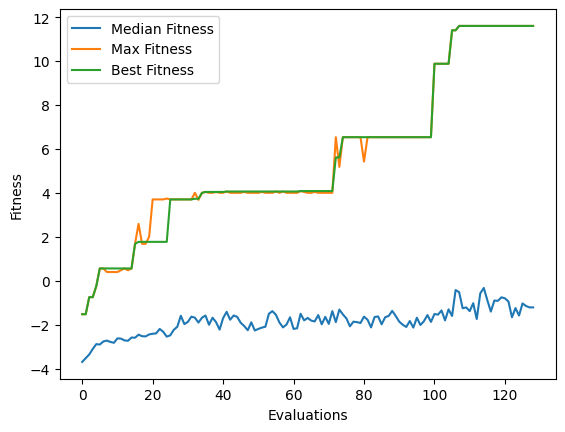

In [6]:
# -- View stats of a completed run
# Rows:
# 0 - Fitness evaluations used
# 1 - Median fitness of population
# 2 - Max fitness of population
# 3 - Top fitness every achieved
# 4 - Median number of nodes of individuals in population
# 5 - Median number of connections of individuals in population
from matplotlib import pyplot as plt
import numpy as np
stats = np.loadtxt('/Users/inata/dev/NEAT/prettyNEAT/log/debug_slimevolley_stats.out', delimiter=',')
fig, ax = plt.subplots()
x = stats[:,0]
y = stats[:,[1,2,3]]
plt.plot(y)
plt.legend(['Median Fitness','Max Fitness','Best Fitness'])
plt.xlabel('Evaluations')
plt.ylabel('Fitness')

# of Connections in ANN:  26


(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

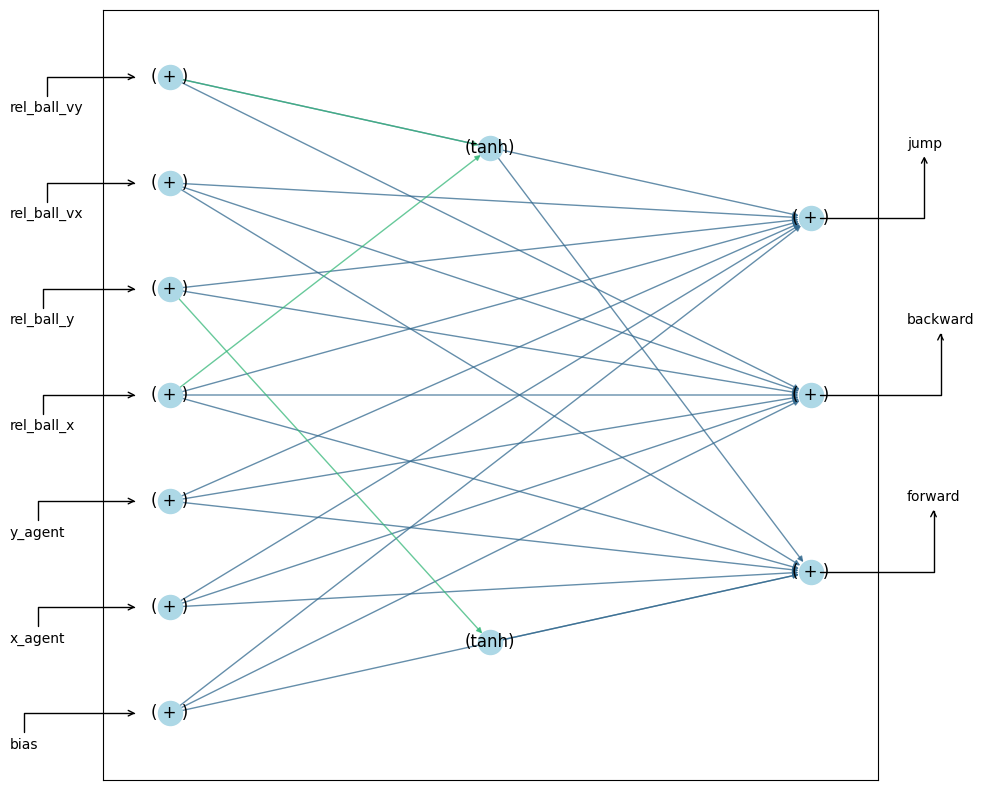

In [7]:
# -- View Topology of Network
# Lighter color connections are connected to earlier layers (NOT weight strength)
import vis as nv
nv.viewInd('/Users/inata/dev/NEAT/prettyNEAT/log/debug_slimevolley_best.out','slimevolley')

In [24]:
# -- View Behavior of Network
!python neat_test.py -p p/slimevolley.json -i log/success1_best.out --view True

	*** Running with hyperparameters:  p/slimevolley.json 	***
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[***]	Fitness: [11.685]
Exception ignored in: <function Viewer.__del__ at 0x131371ca0>
Traceback (most recent call last):
  File "/Users/inata/dev/NEAT/prettyNEAT/.venv/lib/python3.8/site-packages/gym/envs/classic_control/rendering.py", line 143, in __del__
  File "/Users/inata/dev/NEAT/prettyNEAT/.venv/lib/python3.8/site-packages/gym/envs/classic_control/rendering.py", line 62, in close
  File "/Users/inata/dev/NEAT/prettyNEAT/.venv/lib/python3.8/site-packages/pyglet/window/cocoa/__init__.py", line 285, in close
  File "/Users/inata/dev/NEAT/prettyNEAT/.venv/lib/python3.8/site-packages/pyglet/window/__init__.py", line 855, in close
ImportError: sys.meta_path is None, Python is likely shutting down


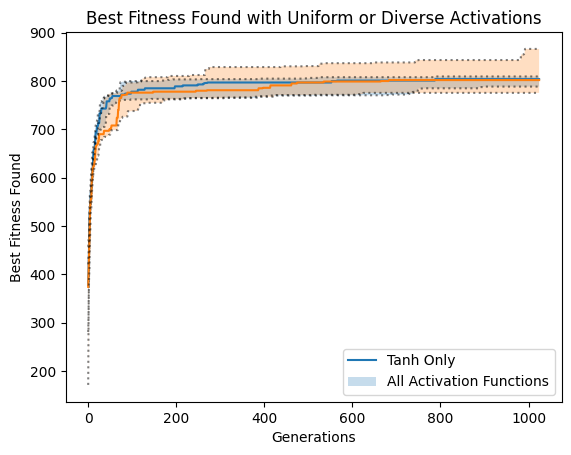

In [ ]:
# -- Compare Replicates
# Run several experiments
#  for i in {0..10}; do python neat_train.py -p p/swingup.json -n 96 -o tanh_$i; done
#  for i in {0..10}; do python neat_train.py -p p/swing_allAct.json -n 96 -o allAct_$i; done
#
# View results as median and quartiles
#
import vis as nv
experiment_1 = 'demo/swingup/tanh'
experiment_2 = 'demo/swingup/allAct'
_,_,bestRun = nv.viewReps([experiment_1,experiment_2],label=['Tanh Only','All Activation Functions'],\
                           title='Best Fitness Found with Uniform or Diverse Activations',getBest=True)